#Text mining 
#Tokenization
Tokenization is the first step in NLP. It is the process of breaking strings into tokens, which in turn are small structures or units. Tokenization involves three steps, 
1. breaking a complex sentence into words
2. understanding the importance of each word with respect to the sentence
3. produce a structural description on an input sentence.

In [ ]:
# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus # sample text for performing tokenization
text = 'In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America' # importing word_tokenize from nltk
from nltk.tokenize import word_tokenize # Passing the string text into word tokenize for breaking the sentences
nltk.download('punkt')
token = word_tokenize(text)
token


Finding frequency distinct in the text

In [ ]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

In [ ]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('Brazil', 2),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

#Stemming
Stemming usually refers to normalizing words into its base form or root form.


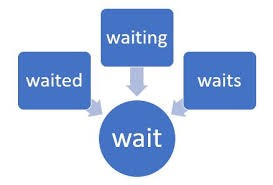

Stemmers:
1.  PorterStemmer
2. LancasterStemmer

In [ ]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem('waiting')

'wait'

In [ ]:
# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


In [ ]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["waited", "waiting", "waits"]
for word in stm :
 print(word+ ':' +lst.stem(word))

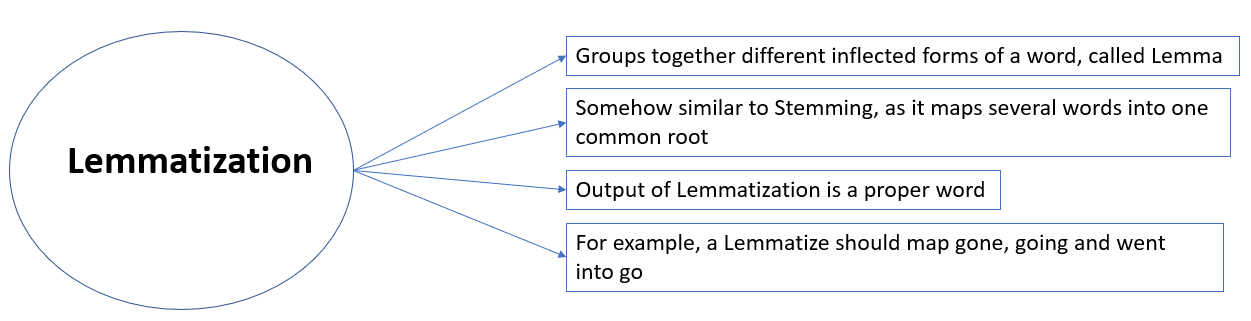

In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
# 
For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care,’ whereas stemming would cutoff the ‘ing’ part and convert it into a car.

Lemmatization can be implemented in python by using:
1. Wordnet Lemmatizer
2. Spacy Lemmatizer
3. TextBlob
4. Stanford CoreNLP

In [ ]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
 
print('rocks :', lemmatizer.lemmatize('rocks')) 
print('corpora :', lemmatizer.lemmatize('corpora'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock
corpora : corpus


#Stop Words
“Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all”. These words do not provide any meaning and are usually removed from texts. We can remove these stop words using nltk library.

In [ ]:
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
a = set(stopwords.words('english'))
print(a)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'ourselves', 'from', 'any', 'only', 'and', 'about', 'who', 'how', "you'd", 'mightn', 'few', 'this', 'under', 'them', 'those', 'shan', 'ma', 'won', 'o', 's', 'she', 'their', 'my', 'ain', 'hasn', "aren't", 'wasn', "doesn't", 'then', "she's", "shouldn't", 'now', 'which', 'being', 'i', 'same', 'themselves', 'theirs', 'by', "it's", 'don', 'out', 'further', 'will', 'was', 'your', 'if', "wouldn't", 'in', 'are', 'itself', 'because', 'to', "mightn't", 'these', 'yourself', 'did', "hasn't", 'himself', 'some', 'each', 'yourselves', 'no', "hadn't", 'very', 'been', 'a', 'hers', 'for', 'above', 'weren', "you've", 'had', 'can', 'needn', 'ours', "isn't", 't', 'whom', 'myself', 'an', 'when', 'has', 'more', "weren't", 'through', 'do', 'against', "you'll", 'him', 'before', 'with', 'the', 'there', 'below', "should've", 'over', "don't", 'off', 'not', 'too', 'our', 'most', 'than', 'yours', 

In [ ]:
text = 'Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal.'
text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


#Application of text analytics using ML with code 
#case study: fake news detection 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re,string
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
#from sklearn import cross_validation
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVM
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.metrics import f1_score

In [ ]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

In [ ]:


def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def stop_rev(text):
    result = []
    token = word_tokenize(text)
    stop = set(stopwords.words('english'))
    #stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']) # remove it if you need punctuation 
    for num in token:
        if num not in stop and len(num) >= 3:
            result.append(num)
    return " ".join(result)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news (1).csv


In [ ]:
df_all = pd.read_csv('news1.csv')
print(df_all.head())

df_all.head(3)
News=df_all['text']
Y=df_all['Label']


   Sl. No.                                               text  Label
0        1  Donald Trump just couldn t wish all Americans ...      1
1        2  House Intelligence Committee Chairman Devin Nu...      1
2        3  On Friday, it was revealed that former Milwauk...      1
3        4  On Christmas day, Donald Trump announced that ...      1
4        5  Pope Francis used his annual Christmas Day mes...      1


Mounted at /content/drive


In [ ]:
df_all.columns

Index(['Sl. No.', 'text', 'Label'], dtype='object')

In [ ]:
df_all.head()
df_all.columns=['text','Label']

In [ ]:
news = df_all["text"]
news



In [ ]:
clean_news = []
for num in News:
    clean_news.append(strip_all_entities(strip_links(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",num).split())))) 
 

In [ ]:
df_new = pd.DataFrame({"clean_news":clean_news, "label":Y})  # data frame with a cleaned news 
df_new.head()

,clean_news,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,On Friday it was revealed that former Milwauke...,1
3,On Christmas day Donald Trump announced that h...,1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_new['clean_news'], Y, test_size=0.3, random_state=42)
########## TF-IDF features generation
vectorizer = TfidfVectorizer()
x_train_vect = vectorizer.fit_transform(Xtrain)
x_test_vect = vectorizer.transform(Xtest)
x_train_vect.shape



(20, 2101)

In [ ]:
################ Implementation of Naive Bayes
from sklearn.naive_bayes import BernoulliNB
mod = BernoulliNB()
mod.fit(x_train_vect,Ytrain)
best_preds = mod.predict(x_test_vect)
print("Accuracy: ",accuracy_score(best_preds,Ytest)) 

Accuracy:  0.8888888888888888


#Deployment of a Machine learning to predict future samples

# use entire dateset to train the model 

In [ ]:
mod = BernoulliNB()
vectorizer = TfidfVectorizer()
x_total = vectorizer.fit_transform(df_new['clean_news'])
print(x_total.shape)
mod.fit(x_total,Y)
best_preds = mod.predict(x_test_vect)  ????
 

#alternative solution 

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_new['clean_news'], Y, test_size=0.01, random_state=42)
########## TF-IDF features generation
vectorizer = TfidfVectorizer()
x_train_vect = vectorizer.fit_transform(Xtrain)
x_test_vect = vectorizer.transform(Xtest)
print(x_train_vect.shape)
x_test_vect.shape
mod = BernoulliNB()
mod.fit(x_train_vect,Ytrain)
best_preds = mod.predict(x_test_vect)
print(best_preds)
print(Xtest)

(28, 2618)
[0]
27    WASHINGTON Reuters Special Counsel Robert Muel...
Name: clean_news, dtype: object


# Text visualization 
plot the word cloud for the cleaned news in this dataset. 



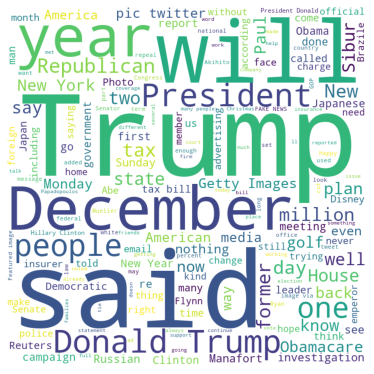

In [ ]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df_new['clean_news']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#Apply ngrams function to print out only tokens with minimum frequency 7. 

In [ ]:
from nltk.util import ngrams
from collections import Counter
n_gram = 3
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 7:
        print(i, n_gram_dic[i])

('pic', 'twitter', 'com') 13
('Donald', 'Trump', 's') 9
('Featured', 'image', 'via') 7
('President', 'Donald', 'Trump') 8


# Example: Use tweet_emotions, 

1. apply NLP to clean and preprocess the dataset

2. Visualize the tweets using wordcloud.

2. Apply Naive Bayes and Logistic regression to train the model based on 80% of tweets

3.  specify best model and deploy the model to predict the sentiment of one sample of tweets. 

In [ ]:
df_all = pd.read_csv('/content/tweet_emotions 1.csv')
df_all.head() 

######
Tweets=df_all['content']
Y=df_all['sentiment']
clean_tweets = []
for num in Tweets:
    clean_tweets.append(strip_all_entities(strip_links(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",num).split())))) 


#########

df_new = pd.DataFrame({"clean_tweets":clean_tweets, "sentiment":Y})  # data frame with a cleaned news 

#####

#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df_new['clean_tweets']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

###############
 #NB classifier 
 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_new['clean_tweets'], Y, test_size=0.2, random_state=42)
########## TF-IDF features generation
vectorizer = TfidfVectorizer()
x_train_vect = vectorizer.fit_transform(Xtrain)
x_test_vect = vectorizer.transform(Xtest)
################ Implementation of Naive Bayes
from sklearn.naive_bayes import BernoulliNB
mod = BernoulliNB()
mod.fit(x_train_vect,Ytrain)
best_preds = mod.predict(x_test_vect)
print("Accuracy: ",accuracy_score(best_preds,Ytest)) 

######
#Logistic regression 

#logistic regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_vect,Ytrain)
lr_preds = lr.predict(x_test_vect)
print("Accuracy: ",accuracy_score(lr_preds,Ytest)) 

#Example 2:

Redo the above task using logistic regression 



In [ ]:
#####Logistic Regression

print("Running the Logistic regression Model")
print("====================================================")
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
mod.fit(x_train_vect,Ytrain)
best_preds = mod.predict(x_test_vect)
print("Accuracy: ",accuracy_score(best_preds,Ytest)) 
